# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Viencent
- **Email:** viencentviencent@gmail.com
- **ID Dicoding:** viencent

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca memengaruhi pola peminjaman sepeda? Apakah ada perbedaan dalam jumlah peminjaman sepeda pada hari-hari dengan cuaca yang berbeda?
- Bagaimana pola peminjaman sepeda antara pengguna casual dan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

1. Memuat data dari tabel **day**.

In [2]:
day_df = pd.read_csv('./data/day.csv')

2. Memuat data dari tabel **hour**.

In [3]:
hour_df = pd.read_csv('./data/hour.csv')

### Assessing Data

#### 1. Menilai tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan terdapat **kesalahan tipe data** pada kolom `dteday` yang seharusnya direpresentasikan sebagai tipe data `datetime`.

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### 2. Menilai tabel `hour_df`

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika diperhatikan terdapat **kesalahan tipe data** pada kolom `dteday` yang seharusnya direpresentasikan sebagai tipe data `datetime`.

In [7]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel `day_df`

##### Memperbaiki tipe data

In [8]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan tabel `hour_df`

##### Memperbaiki tipe data

In [9]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore tabel `day_df`

In [10]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
600,601,2012-08-23,3,1,8,0,4,1,1,0.695833,0.637008,0.635833,0.084596,1363,6402,7765
234,235,2011-08-23,3,0,8,0,2,1,1,0.640833,0.606067,0.455417,0.146763,1281,4614,5895
182,183,2011-07-02,3,0,7,0,6,0,1,0.738333,0.667308,0.444583,0.115062,2204,2915,5119
165,166,2011-06-15,2,0,6,0,3,1,1,0.626667,0.587754,0.471667,0.167912,769,4411,5180
579,580,2012-08-02,3,1,8,0,4,1,1,0.752500,0.707088,0.659583,0.129354,983,6278,7261


In [11]:
day_df.groupby(by='weathersit').agg({
  'cnt': ['max', 'min', 'mean', 'std'],
})

cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1803.285714  1240.284449

Berdasarkan pivot table di atas, dapat diketahui bahwa pengguna lebih banyak menyewa sepeda saat cuaca cerah dan berawan daripada saat hujan ringan/salju

In [12]:
day_df.groupby(by='weathersit').agg({
  'temp': ['max', 'min', 'mean', 'std'],
  'atemp': ['max', 'min', 'mean', 'std'],
  'hum': ['max', 'min', 'mean', 'std'],
  'windspeed': ['max', 'min', 'mean', 'std'],
})

temp                                  atemp            \
                 max      min      mean       std       max       min   
weathersit                                                              
1           0.861667  0.05913  0.511541  0.191165  0.840896  0.079070   
2           0.815000  0.10750  0.470366  0.167180  0.826371  0.119337   
3           0.633913  0.21750  0.433440  0.131473  0.555361  0.203600   

                                     hum                                \
                mean       std       max       min      mean       std   
weathersit                                                               
1           0.488596  0.170242  0.835833  0.187917  0.565594  0.112472   
2           0.452868  0.148403  0.972500  0.407083  0.725887  0.109648   
3           0.413064  0.120748  0.970417  0.000000  0.848872  0.201572   

           windspeed                                
                 max       min      mean       std  
weathersit                                          
1           0.507463  0.022392  0.190253  0.077530  
2           0.414800  0.047275  0.186431  0.075331  
3           0.358200  0.097021  0.243336  0.086185

Berdasarkan pivot table di atas, dapat diketahui statistik ringkasan untuk setiap kondisi cuaca.

In [13]:
day_df.groupby('mnth')[['casual', 'registered']].sum()

,casual,registered
mnth,,
1,12042,122891
2,14963,136389
3,44444,184476
4,60802,208292
5,75285,256401
6,73906,272436
7,78157,266791
8,72039,279155
9,70323,275668


Berdasarkan pivot table di atas, dapat diketahui penyewaan sepeda oleh _casual users_ paling banyak terjadi pada bulan Juli sedangkan _registered user_ pada bulan Agustus.

### Explore tabel `hour_df`

In [14]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4486,4487,2011-07-10,3,0,7,20,0,0,0,1,0.76,0.6970,0.55,0.1940,101,167,268
16911,16912,2012-12-12,4,1,12,10,0,3,1,2,0.30,0.3030,0.56,0.1642,20,116,136
9959,9960,2012-02-25,1,1,2,0,0,6,0,1,0.36,0.3333,0.43,0.3881,5,56,61
4165,4166,2011-06-27,3,0,6,11,0,1,1,2,0.70,0.6515,0.58,0.0000,55,95,150
6205,6206,2011-09-21,3,0,9,3,0,3,1,2,0.54,0.5152,0.94,0.0896,0,6,6


In [15]:
hour_df.groupby(by='weathersit').agg({
  'cnt': ['max', 'min', 'mean', 'std'],
})

cnt                            
            max min        mean         std
weathersit                                 
1           977   1  204.869272  189.487773
2           957   1  175.165493  165.431589
3           891   1  111.579281  133.781045
4           164  23   74.333333   77.925178

Berdasarkan pivot table di atas, dapat diketahui bahwa pengguna lebih banyak menyewa sepeda saat cuaca cerah dan berawan daripada saat hujan lebat.

In [16]:
hour_df.groupby(by=['hr']).cnt.sum().sort_values(ascending=False)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa banyak pengguna menyewa sepeda di jam 5 sore dan paling sedikit di jam 4 pagi.

In [17]:
hour_df.groupby('weathersit')['hr'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='counts')

,weathersit,counts
0,1,20
1,2,9
2,3,17
3,4,16


Berdasarkan hasil di atas, dapat dilihat bahwa cuaca cerah sering terjadi pada jam 8 malam, cuaca berkabut pada jam 9 pagi, cuaca hujan pada jam 5 sore dan cuaca badai pada jam 4 sore.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Bagaimana cuaca memengaruhi pola peminjaman sepeda? Apakah ada perbedaan dalam jumlah peminjaman sepeda pada hari-hari dengan cuaca yang berbeda?

Membuat DataFrame baru untuk menampung data jumlah peminjaman sepeda harian berdasarkan cuaca.

In [18]:
byweather_df = pd.DataFrame(day_df.groupby(by='weathersit')['cnt'].sum().sort_values(ascending=False).reset_index())
byweather_df.weathersit = byweather_df.weathersit.map({1: 'Sunny', 2: 'Foggy', 3: 'Rainy', 4: 'Stormy'})
byweather_df.rename(columns={'weathersit': 'weather', 'cnt': 'rental_bikes_count'}, inplace=True)
byweather_df

,weather,rental_bikes_count
0,Sunny,2257952
1,Foggy,996858
2,Rainy,37869


Membuat barplot untuk DataFrame `byweather`.

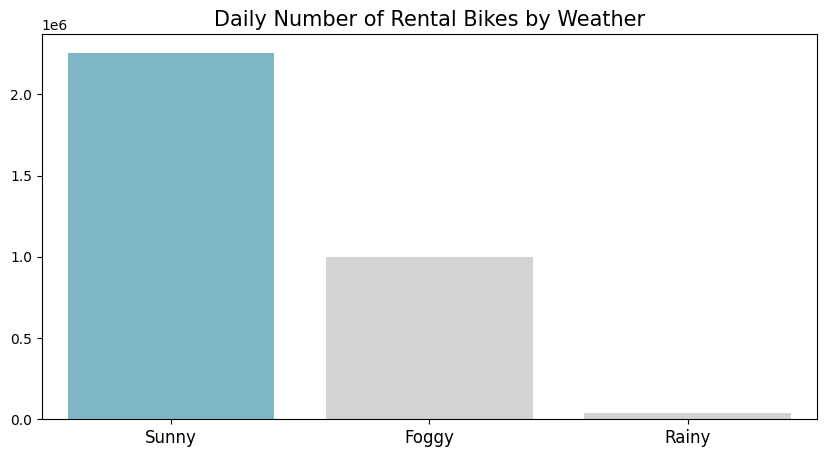

In [19]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]
sns.barplot(
  y='rental_bikes_count',
  x='weather',
  hue='weather',
  data=byweather_df,
  palette=colors,
)
plt.title("Daily Number of Rental Bikes by Weather", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Membuat DataFrame baru untuk menampung data jumlah peminjaman sepeda setiap jam berdasarkan cuaca.

In [20]:
weather_trend = pd.DataFrame(hour_df.groupby(['hr', 'weathersit'])['cnt'].sum().unstack())
weather_trend.rename(columns={1: 'Sunny', 2: 'Foggy', 3: 'Rainy', 4: 'Stormy'}, inplace=True)
weather_trend.index = weather_trend.index.astype(str)

Membuat line plot untuk DataFrame `weather_trend`.

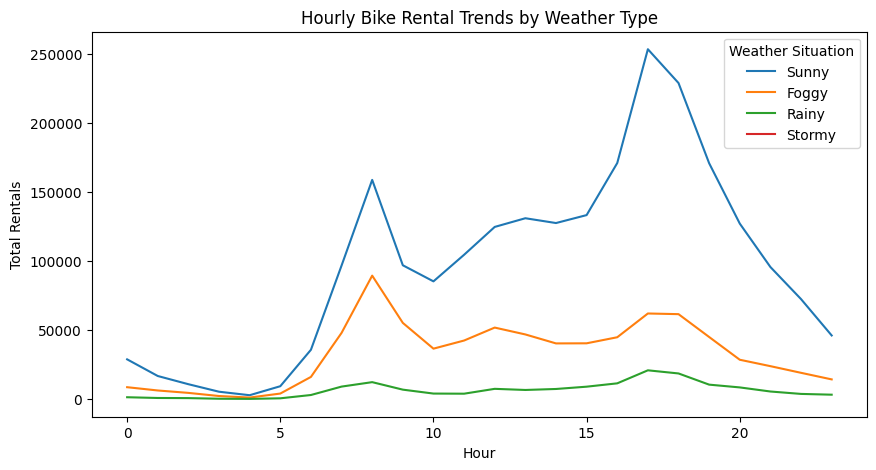

In [21]:
weather_trend.plot(figsize=(10, 5))
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.title('Hourly Bike Rental Trends by Weather Type')
plt.legend(title='Weather Situation')
plt.show()

### Pertanyaan 2:

#### Bagaimana pola peminjaman sepeda antara pengguna casual dan pengguna terdaftar?

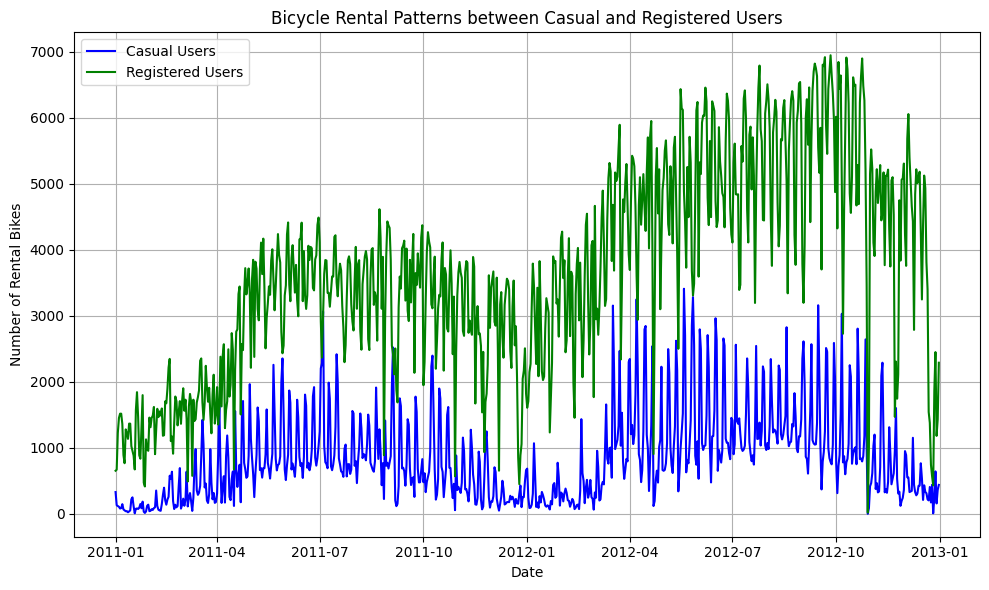

In [22]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot garis tren peminjaman sepeda oleh Casual Users
plt.plot(day_df['dteday'], day_df['casual'], color='blue', label='Casual Users')

# Plot garis tren peminjaman sepeda oleh Registered Users
plt.plot(day_df['dteday'], day_df['registered'], color='green', label='Registered Users')

# Label sumbu dan judul
plt.xlabel('Date')
plt.ylabel('Number of Rental Bikes')
plt.title('Bicycle Rental Patterns between Casual and Registered Users')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

- Berdasarkan visualisasi bar plot tersebut, dapat diketahui bahwa lebih banyak pengguna rental sepeda saat hari sedang cerah dan berdasarkan visualisasi line plot setelahnya dapat diketahui bahwa cuaca pada jam tertentu juga memengaruhi frekuensi dari pengguna rental sepeda.
- Berdasarkan visualisasi line plot tersebut, dapat diketahui bahwa terjadi penurunan pengguna baik pengguna casual maupun pengguna terdaftar di akhir dan awal tahun 2012, kemudian terdapat peningkatan pengguna kasual dipertengahan tahun 2012 diikuti peningkatan pengguna terdaftar yang signifikan.